## **Tiger Analytics Assignment**

**Problem Statement:** use the order details, inventory data to decide if a product should be promoted/advertised

**Objective:** plot the sales data on time axis, like a time series and check for trends using regression lines, then give conclusion based on those trends

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_inv = pd.read_excel('/content/Inventory Details.xlsx')
df_inv.head()

,Inventory data as on 31-01-2021,Unnamed: 1,Unnamed: 2
0,Category,Sub Category,Inventory
1,Advertising & Marketing,Brochures,671
2,Advertising & Marketing,Trade Show Counters,4010
3,Advertising & Marketing,Trade Show Displays,3077
4,Automation Control Components,Programmable Logic Controllers,8707


fix df_inv columns

In [ ]:
Dict = df_inv.iloc[0]
df_inv.columns = Dict
df_inv = df_inv.iloc[1:, :]
df_inv.head()

,Category,Sub Category,Inventory
1,Advertising & Marketing,Brochures,671
2,Advertising & Marketing,Trade Show Counters,4010
3,Advertising & Marketing,Trade Show Displays,3077
4,Automation Control Components,Programmable Logic Controllers,8707
5,Automation Control Components,Variable Frequency & Adjustable Speed Drives,1693


In [ ]:
df_orderList = pd.read_excel('/content/List of Orders - Region.xlsx', parse_dates=['Order Date'])
df_orderList.head()

,Order-ID,Order Date,City,State
0,CA15001,2020-01-01,Bangalore,Karnataka
1,CA15002,2020-01-01,Gangtok,Sikkim
2,CA15003,2020-01-01,Jaipur,Rajasthan
3,CA15004,2020-01-01,Delhi,Delhi
4,CA15005,2020-01-01,Kolkata,West Bengal


In [ ]:
df_NewLaunch = pd.read_excel('/content/New Product Launches.xlsx')
df_NewLaunch.head()

,New Product launches across categories between 01-10-2019 and 31-12-2019,Unnamed: 1
0,Category,Sub Category
1,Advertising & Marketing,Brochures
2,Advertising & Marketing,Trade Show Counters
3,Advertising & Marketing,Trade Show Displays
4,Baby Bathing,Baby Bathtubs & Bath Seats


In [ ]:
# fix the column headers
Dict = df_NewLaunch.iloc[0]
df_NewLaunch.columns = Dict
df_NewLaunch = df_NewLaunch.iloc[1:, :]
df_NewLaunch.head()

,Category,Sub Category
1,Advertising & Marketing,Brochures
2,Advertising & Marketing,Trade Show Counters
3,Advertising & Marketing,Trade Show Displays
4,Baby Bathing,Baby Bathtubs & Bath Seats
5,Baby Health,Dummies & Teethers


In [ ]:
df_OrderDetails = pd.read_excel('/content/Order Details.xlsx')
df_OrderDetails.head()

,Order-ID,Category,Sub Category,Quantity,Price per Unit (in INR)
0,CA15001,Food Service,Tilting Skillets,5,110
1,CA15002,Pet Supplies,Pet Playpens,5,320
2,CA15003,Clothing,Skorts,5,80
3,CA15004,Clothing Accessories,Gloves & Mittens,8,960
4,CA15004,Food Service,Food Service Carts,8,710


Exploring the inventory details table

In [ ]:
df_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 1 to 297
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Category      297 non-null    object
 1   Sub Category  297 non-null    object
 2   Inventory     297 non-null    object
dtypes: object(3)
memory usage: 7.1+ KB


In [ ]:
df_inv.describe()

,Category,Sub Category,Inventory
count,297,297,297
unique,35,297,295
top,Pet Supplies,Brochures,5370
freq,46,1,2


In [ ]:
# how many sub categories do each one have
df_inv.groupby(by=['Category','Sub Category']).sum()

0                                                                              Inventory
Category                         Sub Category                                           
Advertising & Marketing          Brochures                                           671
                                 Trade Show Counters                                4010
                                 Trade Show Displays                                3077
Automation Control Components    Programmable Logic Controllers                     8707
                                 Variable Frequency & Adjustable Speed Drives       1693
...                                                                                  ...
Work Safety Protective Equipment Safety Gloves                                      9209
                                 Safety Knee Pads                                   5951
                                 Welding Helmets                                    2401
                                 Work Safety Harnesses                              1611
                                 Work Safety Tethers                                1302

[297 rows x 1 columns]

In [ ]:
df_OrderDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30441 entries, 0 to 30440
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Order-ID                 30441 non-null  object
 1   Category                 30441 non-null  object
 2   Sub Category             30441 non-null  object
 3   Quantity                 30441 non-null  int64 
 4   Price per Unit (in INR)  30441 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.2+ MB


In [ ]:
df_orderList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19624 entries, 0 to 19623
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order-ID    19624 non-null  object        
 1   Order Date  19624 non-null  datetime64[ns]
 2   City        19624 non-null  object        
 3   State       19624 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 613.4+ KB


try doing some analysis, using this sales data
how much sales for every month??

join the order details data tables, to get sales data

In [ ]:
# df_sales = df_OrderDetails.join(df_orderList, on='Order-ID', how='outer')
df_sales = df_OrderDetails.merge(df_orderList, how='outer', on='Order-ID')
df_sales.head()
# DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False, validate=None)

,Order-ID,Category,Sub Category,Quantity,Price per Unit (in INR),Order Date,City,State
0,CA15001,Food Service,Tilting Skillets,5,110,2020-01-01,Bangalore,Karnataka
1,CA15002,Pet Supplies,Pet Playpens,5,320,2020-01-01,Gangtok,Sikkim
2,CA15003,Clothing,Skorts,5,80,2020-01-01,Jaipur,Rajasthan
3,CA15004,Clothing Accessories,Gloves & Mittens,8,960,2020-01-01,Delhi,Delhi
4,CA15004,Food Service,Food Service Carts,8,710,2020-01-01,Delhi,Delhi


In [ ]:
df_sales.isna().sum()

Order-ID                   0
Category                   0
Sub Category               0
Quantity                   0
Price per Unit (in INR)    0
Order Date                 0
City                       0
State                      0
dtype: int64

group this data by months

In [ ]:
df_sales['total_sale'] = df_sales['Quantity']*df_sales['Price per Unit (in INR)']

In [ ]:
# grp by year, sale per year
df_sales.groupby(df_sales['Order Date'].dt.year)['total_sale'].sum()

Order Date
2020    52813480
2021    49248830
Name: total_sale, dtype: int64

In [ ]:
# grp by year, sale per month
df_monthly = df_sales.groupby(by=[df_sales['Order Date'].dt.year,df_sales['Order Date'].dt.month])['total_sale'].sum()
df_monthly

Order Date  Order Date
2020        1             4421460
            2             4595080
            3             3927880
            4             4083860
            5             4497170
            6             4485590
            7             4780570
            8             4379600
            9             4572760
            10            4095180
            11            4425650
            12            4548680
2021        1             4584060
            2             4304400
            3             6501020
            4             9417400
            5             9021860
            6             8662390
            7             6757700
Name: total_sale, dtype: int64

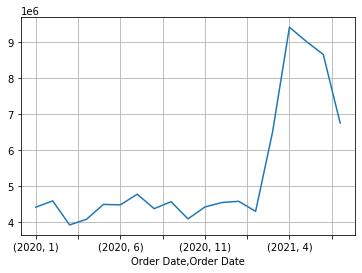

In [ ]:
# visualize this
df_monthly.plot( grid=True)

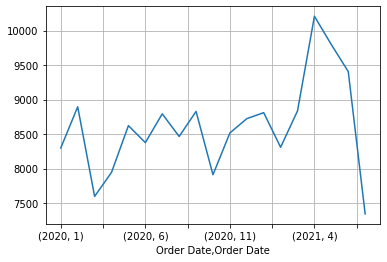

In [ ]:
df_monthly_itemCnt = df_sales.groupby(by=[df_sales['Order Date'].dt.year,df_sales['Order Date'].dt.month])['Quantity'].sum()
# df_monthly_itemCnt
# visualize this
df_monthly_itemCnt.plot( grid=True)

In [ ]:
# monthly sales category wise
df_monthly_cat = df_sales.groupby( by=[df_sales['Order Date'].dt.year,
                                       df_sales['Order Date'].dt.month, 
                                       'Category'])['total_sale'].sum()
df_monthly_cat

Order Date  Order Date  Category                     
2020        1           Advertising & Marketing            96590
                        Automation Control Components      27810
                        Baby Bathing                       98560
                        Baby Health                       142040
                        Baby Safety                       137060
                                                          ...   
2021        7           Cameras                           586960
                        Clothing Accessories             1663340
                        Food Service                      578550
                        Nursing & Feeding                 604800
                        Pet Supplies                      549450
Name: total_sale, Length: 552, dtype: int64

In [ ]:
# what are these categories
df_sales['Category'].describe()

count                    30441
unique                      35
top       Clothing Accessories
freq                      4472
Name: Category, dtype: object

so here we see that there are 35 different catgories to explore, 
we should also check their sub categories in the sales

In [ ]:
df_SALE_1 = df_sales.groupby(by=['Category','Sub Category']).sum()
df_SALE_1

Quantity  \
Category                         Sub Category                                             
Advertising & Marketing          Brochures                                          472   
                                 Trade Show Counters                                524   
                                 Trade Show Displays                                554   
Automation Control Components    Programmable Logic Controllers                     496   
                                 Variable Frequency & Adjustable Speed Drives       528   
...                                                                                 ...   
Work Safety Protective Equipment Safety Gloves                                      471   
                                 Safety Knee Pads                                   432   
                                 Welding Helmets                                    490   
                                 Work Safety Harnesses                              551   
                                 Work Safety Tethers                                 30   

                                                                               Price per Unit (in INR)  \
Category                         Sub Category                                                            
Advertising & Marketing          Brochures                                                       64970   
                                 Trade Show Counters                                             48450   
                                 Trade Show Displays                                             49820   
Automation Control Components    Programmable Logic Controllers                                  71280   
                                 Variable Frequency & Adjustable Speed Drives                    16920   
...                                                                                                ...   
Work Safety Protective Equipment Safety Gloves                                                   28520   
                                 Safety Knee Pads                                                60060   
                                 Welding Helmets                                                 49140   
                                 Work Safety Harnesses                                           34200   
                                 Work Safety Tethers                                             15390   

                                                                               total_sale  
Category                         Sub Category                                              
Advertising & Marketing          Brochures                                         344560  
                                 Trade Show Counters                               267240  
                                 Trade Show Displays                               293620  
Automation Control Components    Programmable Logic Controllers                    401760  
                                 Variable Frequency & Adjustable Speed Drives       95040  
...                                                                                   ...  
Work Safety Protective Equipment Safety Gloves                                     146010  
                                 Safety Knee Pads                                  332640  
                                 Welding Helmets                                   264600  
                                 Work Safety Harnesses                             209380  
                                 Work Safety Tethers                                24300  

[297 rows x 3 columns]

In [ ]:
# df_monthly_cat.plot( kind='bar' , figsize=(20,6), grid=False, use_index=False ) # ,xticks=[])

In [ ]:
# check sales, and inventory side by side,
# do this for every category and its subcategory, 
# if inventory has stock, and sales are not looking good, then suggest promotions/discount


In [ ]:
# to inspect inventory table, make pivot table of df_inv
# df_inv.head()
df_INVENTORY_1 = df_inv.pivot_table( index=['Category','Sub Category'] ,values='Inventory')
df_INVENTORY_1

0                                                                              Inventory
Category                         Sub Category                                           
Advertising & Marketing          Brochures                                         671.0
                                 Trade Show Counters                              4010.0
                                 Trade Show Displays                              3077.0
Automation Control Components    Programmable Logic Controllers                   8707.0
                                 Variable Frequency & Adjustable Speed Drives     1693.0
...                                                                                  ...
Work Safety Protective Equipment Safety Gloves                                    9209.0
                                 Safety Knee Pads                                 5951.0
                                 Welding Helmets                                  2401.0
                                 Work Safety Harnesses                            1611.0
                                 Work Safety Tethers                              1302.0

[297 rows x 1 columns]

now we have two tables of interest, 

*   df_SALES_1
*   df_INVENTORY_1

now check their sales trends, on monthly basis, then use them to make decisions

In [ ]:
All_cat = df_sales['Category'].unique()
All_cat

array(['Food Service', 'Pet Supplies', 'Clothing', 'Clothing Accessories',
       'Diapering', 'Cameras', 'Optics', 'Jewellery & Watches',
       'Work Safety Protective Equipment', 'Nursing & Feeding', 'Signage',
       'Advertising & Marketing', 'Dentistry', 'Party & Celebration',
       'Camera & Optic Accessories', 'Baby Bathing',
       'Piercing & Tattooing', 'Baby Toys & Activity Equipment',
       'Baby Transport Accessories', 'Science & Laboratory', 'Medical',
       'Baby Transport', 'Material Handling', 'Baby Health',
       'Hobbies & Creative Arts', 'Baby Safety',
       'Handbag & Wallet Accessories', 'Handbags, Wallets & Cases',
       'Retail', 'Potty Training', 'Photography',
       'Automation Control Components', 'Swaddling & Receiving Blankets',
       'Industrial Storage', 'Costumes & Accessories'], dtype=object)

In [ ]:
# now get their respective sub-categories
Sub_cats = {}
for c in All_cat :
  Sub_cats[c] = df_sales[ df_sales['Category']==c ]['Sub Category'].unique()
Sub_cats

{'Food Service': array(['Tilting Skillets', 'Food Service Carts', 'Vending Machines',
        'Bakery Boxes', 'Food Service Baskets', 'Hot Dog Rollers',
        'Plate & Dish Warmers', 'Bus Boxes',
        'Disposable Serving Accessories', 'Bill Presenters',
        'Disposable Tableware', 'Sneeze Guards', 'Disposable Lids',
        'Food Washers & Dryers', 'Takeaway Containers',
        'Concession Food Containers', 'Ice Bins'], dtype=object),
 'Pet Supplies': array(['Pet Playpens', 'Pet Agility Equipment', 'Pet Food Containers',
        'Cat Supplies', 'Dog Supplies', 'Vehicle Pet Barriers',
        'Pet Waste-Disposal Systems & Tools',
        'Pet Heating-Pad Accessories', 'Reptile & Amphibian Supplies',
        'Cat & Dog Flaps', 'Pet Bowl Mats', 'Pet Door Accessories',
        'Pet Medical Collars', 'Pet Oral Care Supplies', 'Pet Bowl Stands',
        'Pet Bed Accessories', 'Pet Food Scoops',
        'Pet Pushchairs & Strollers', 'Pet Clothes Hangers',
        'Pet Bowls, Feeders

In [ ]:
# now pivot the order details table, after you have filtered by Catgry, Sub catgry,
# 
df_temp = df_sales[ (df_sales['Category']==All_cat[0]) ][  (df_sales['Sub Category']==Sub_cats[All_cat[0]][0]) ]
# and df_sales['Sub Category']==Sub_cats[All_cat[0]][0] 
df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Order-ID,Category,Sub Category,Quantity,Price per Unit (in INR),Order Date,City,State,total_sale
0,CA15001,Food Service,Tilting Skillets,5,110,2020-01-01,Bangalore,Karnataka,550
177,CA15124,Food Service,Tilting Skillets,4,110,2020-01-04,Surat,Gujarat,440
305,CA15215,Food Service,Tilting Skillets,7,110,2020-01-05,Allahabad,Uttar Pradesh,770
1067,CA15748,Food Service,Tilting Skillets,9,110,2020-01-21,Jaipur,Rajasthan,990
1102,CA15775,Food Service,Tilting Skillets,2,110,2020-01-22,Kohima,Nagaland,220
...,...,...,...,...,...,...,...,...,...
21993,CB-30507,Food Service,Tilting Skillets,9,110,2021-02-27,Delhi,Delhi,990
22424,CB-30821,Food Service,Tilting Skillets,5,110,2021-03-05,Kashmir,Jammu and Kashmir,550
22484,CB-30864,Food Service,Tilting Skillets,6,110,2021-03-06,Bangalore,Karnataka,660
22687,CB-31020,Food Service,Tilting Skillets,4,110,2021-03-12,Goa,Goa,440


In [ ]:
# now grp by dates and plot it to see how its sales are doing
# let's just write a function for this, as we are going to these operations a lot
from pandas.plotting import autocorrelation_plot
 
# function to reset sales_data
def reset_salesData() :
  df_sales = df_OrderDetails.merge(df_orderList, how='outer', on='Order-ID')

def Prep_n_plot( df, arg2 = None, arg3 = None ) :
  '''
      pass args
        arg1, a pd.DataFrame,
        arg2, a List
        arg3, a Dictionary

      func: filters df and plots the result
  '''
  reset_salesData()
  df_temp = df[ ( df['Category']==arg2 ) ][  ( df['Sub Category']==arg3 ) ]
  df_ans = pd.DataFrame(df_temp.groupby( by=[df_temp['Order Date'].dt.year,
                           df_temp['Order Date'].dt.month] 
                      )['Quantity'].sum())
  
  # working 1
  # visualize this
  # df_ans.plot( grid=True, title=(str(arg2)+" : "+str(arg3)))
  # autocorrelation_plot(df_ans['Quantity'])
  plt.show()
  x_ind = []
  for t in df_ans.index :
    x_ind.append( t[0])

  # we will use a regplot trend for our decision making
  sns.regplot(data=df_ans ,x=x_ind, y=df_ans , x_ci='sd', scatter=False, fit_reg=True, ci=95, n_boot=1000, order=1, label=arg3, marker='o')
  # plt.show()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


0
Inventory    6605.0
Name: (Food Service, Tilting Skillets), dtype: float64


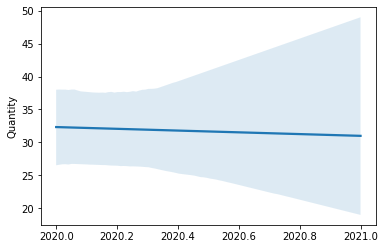

0
Inventory    5525.0
Name: (Food Service, Food Service Carts), dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


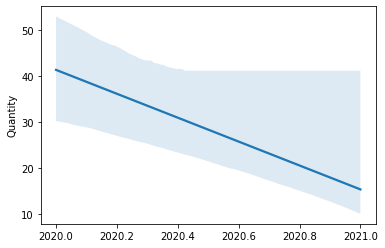

0
Inventory    9963.0
Name: (Food Service, Vending Machines), dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


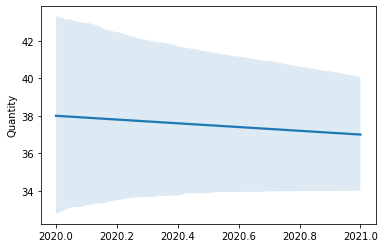

0
Inventory    7850.0
Name: (Food Service, Bakery Boxes), dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


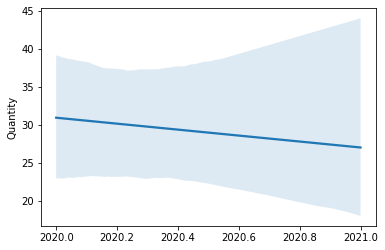

0
Inventory    812.0
Name: (Food Service, Food Service Baskets), dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


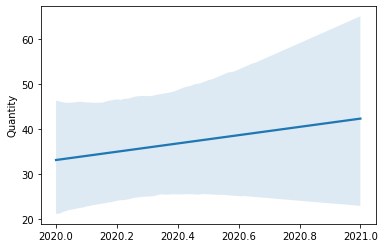

0
Inventory    7610.0
Name: (Food Service, Hot Dog Rollers), dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


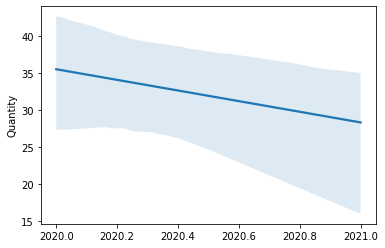

0
Inventory    6374.0
Name: (Food Service, Plate & Dish Warmers), dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


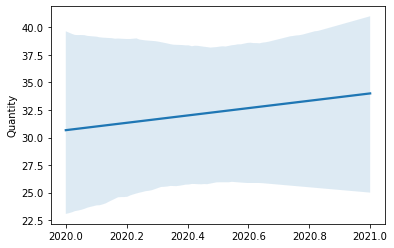

0
Inventory    803.0
Name: (Food Service, Bus Boxes), dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


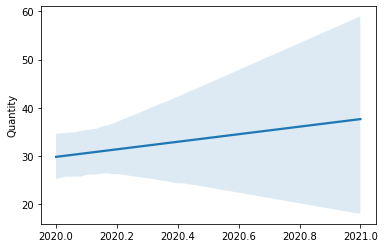

0
Inventory    2394.0
Name: (Food Service, Disposable Serving Accessories), dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


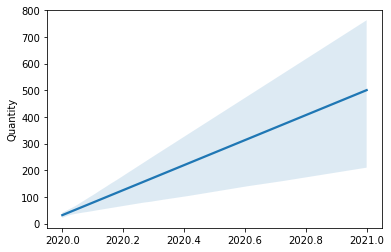

0
Inventory    8731.0
Name: (Food Service, Bill Presenters), dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


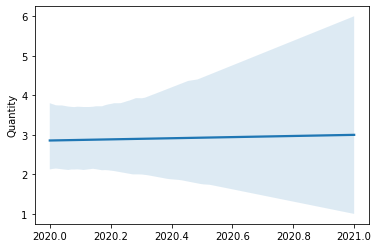

0
Inventory    4686.0
Name: (Food Service, Disposable Tableware), dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


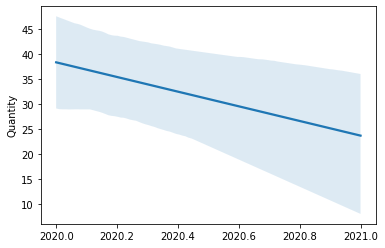

0
Inventory    3394.0
Name: (Food Service, Sneeze Guards), dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


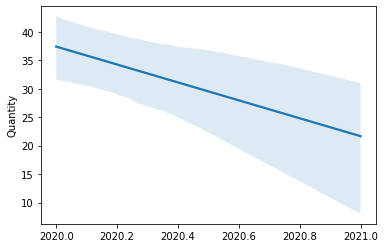

0
Inventory    9734.0
Name: (Food Service, Disposable Lids), dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


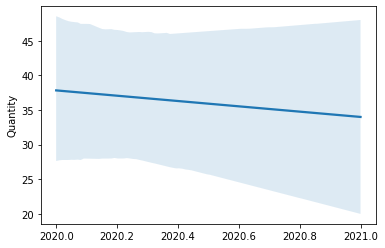

0
Inventory    1274.0
Name: (Food Service, Food Washers & Dryers), dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


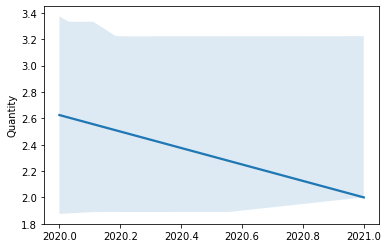

0
Inventory    6486.0
Name: (Food Service, Takeaway Containers), dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


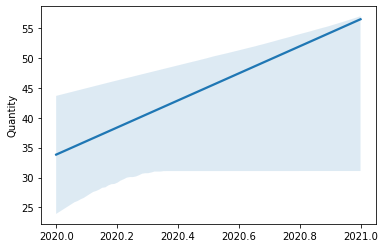

0
Inventory    6025.0
Name: (Food Service, Concession Food Containers), dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


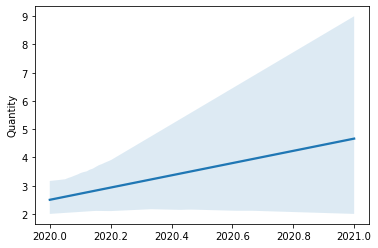

0
Inventory    989.0
Name: (Food Service, Ice Bins), dtype: float64


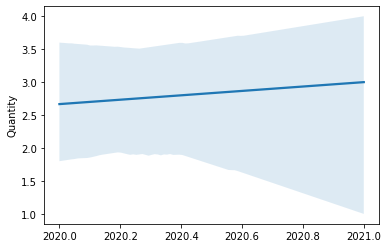

In [ ]:
# let's explore the plots one by one forr each category
# plt.figure()
for s in Sub_cats[ All_cat[0] ] :
  Prep_n_plot( df_sales, arg2 = All_cat[0], arg3 = s )
  # print()
  if (All_cat[0],s) in df_INVENTORY_1.index :
    print( df_INVENTORY_1.loc[(All_cat[0],s)])
  else :
    print("In inventory: ",0)
  
# plt.legend(handles=s, loc='best')
# plt.show()

Consider the plot, if there is a downwards trend, then suggest promotion, other-wise don't

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


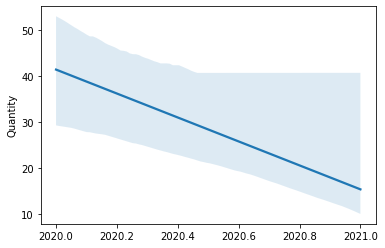

In [ ]:
Prep_n_plot( df_sales, arg2 = All_cat[0], arg3 = Sub_cats[ All_cat[0] ][1])

here we seee downward trend, so we can suggest promotion.

Now, check plot for every Category and its sub category, 
1. if there is a downward trend, and you have a lot of inventory, 
promotion is needed
2. if there is no trend, and have inventory then, then suggest promotions
3. if there is upward trend, then don't worry